In [1]:
%load_ext autoreload
%autoreload 2

import math
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
import numpy as np
import pandas as pd
import matplotlib.transforms as transforms


from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import datetime
import statsmodels

# Local Modules
import sys
import os.path
sys.path.insert(0, os.path.abspath('/scratch/horta/coronawiki/'))
from helpers.load import load_interventions, load_aggregated, load_topics
from helpers.vars import codes, helper_langs, interventions_helper, topics, codes
from helpers.plot import set_size, plot_dates, plot_interventions
from helpers.topics import order_topics, colors_z, get_df_pageviews_topics
from helpers.diffs_n_diffs import get_standard_error_sum
from dateutil.relativedelta import relativedelta

/Users/horta/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Latex Configuration
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
# fontpath = os.path.expanduser('~/LinLibertine_DRah.ttf')
# prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 14,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'Linux Libertine Display',
    'text.usetex': True
}

mpl.rcParams.update(params)

## Loads Data

In [3]:
interventions = load_interventions("../data/interventions.csv")
topics_df, topics = load_topics('../data/topics_linked.csv.xz')
agg = load_aggregated("../data/aggregated_timeseries.json.gz")
codes_order = ["sr", "it", "fr", "en", "nl", "ko", "de", "fi", "ja", "no", "sv", "da"]
time_int = 35

## Performs diffs-in-diffs

In [4]:
mobility = lambda x, delta: interventions[x.replace(".m", "")]["Mobility"] + delta
normalcy = lambda x, delta: interventions[x.replace(".m", "")]["Normalcy"] + delta

df_pageviews, df_pageviews_results = get_df_pageviews_topics(agg, 
                                                      mobility, relativedelta(days=0),
                                                      mobility, relativedelta(days=0),
                                                      time_int)

df_pageviews_norm, df_pageviews_norm_results = get_df_pageviews_topics(agg, 
                                                                mobility, relativedelta(days=time_int), 
                                                                normalcy, relativedelta(days=0), 
                                                                time_int)

df_pageviews_norm2, df_pageviews_norm_results2 = get_df_pageviews_topics(agg, 
                                                            mobility, relativedelta(days=0),
                                                            normalcy, relativedelta(days=0),
                                                            time_int)

R2: 0.8865525980016313
params: 256
-0.05406275743433543
0.12342107609291712
-0.0026012405083244254
0.0773350320791876
0.14261483138246012
0.15189504417641086
0.15227544032217177
0.010507310040842564
0.06251434560501433
-0.05887615115921489
0.14048681172346572
0.2742587229122031
0.0582327488666954
-0.012630403942776373
-0.13398722476268166
-0.2295575318950846
0.0816139236539389
0.09336178699596026
-0.04260024191821589
0.025494919958692252
-0.025803989674395112
-0.112942478986104
0.08006120914146723
0.034693889386681914
0.06230851745810559
0.07655616387046722
0.14556905753254964
-0.08531660277456023
-0.007583280414631927
0.009584565631523274
0.030178697955620216
0.017255943199026194
-0.12306888099655681
-0.051246145087889605
0.009897337073952347
-0.0734285175081629
-0.06905496701605067
-0.0005774181194034902
-0.03841987429877061
-0.07022202749849936
0.0030559301492243465
0.017573697296920418
-0.04852947790868896
-0.006837110884125624
-0.15227915156685903
0.07267853406937494
0.02734087664

## Plots image

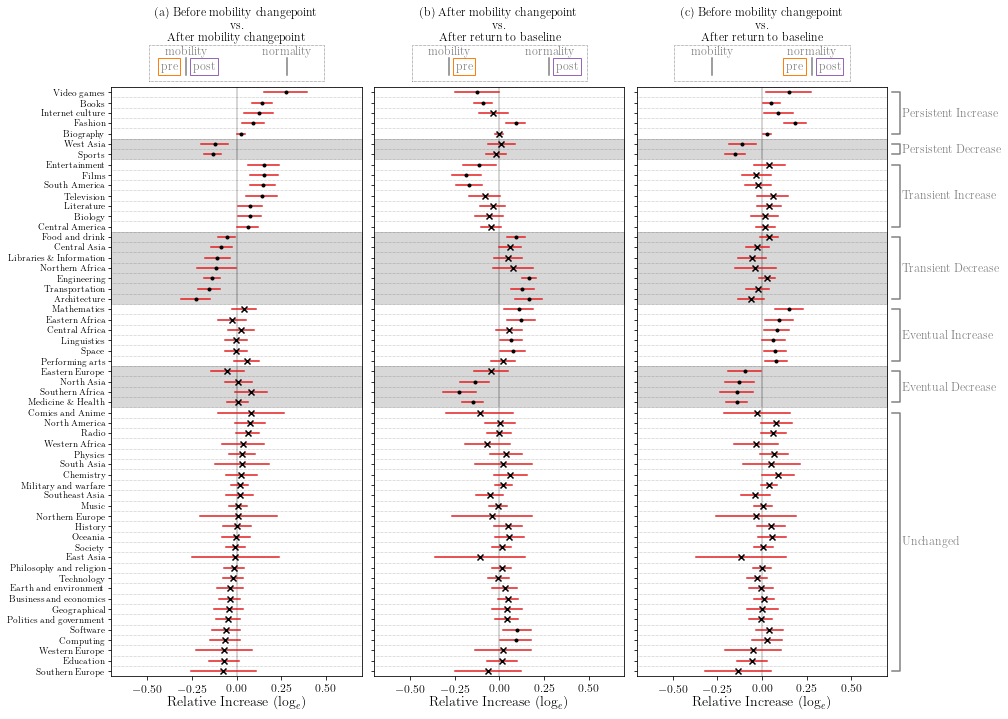

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(14, 10), sharey=True, sharex=True,
                       gridspec_kw={"hspace": 0.15, "wspace": 0.05})
for idx, topic in enumerate(order_topics):
    for idy, df in enumerate([df_pageviews_results, df_pageviews_norm_results, df_pageviews_norm_results2]):
        row = dict(df[df.topic == topic].iloc[0])
        marker = "." if row["pval"] else "x"

        axes[idy].scatter([row["val"]], [idx], color="black", marker=marker, zorder=2)
        axes[idy].plot([row["low"], row["high"]], [idx, idx], color="#e41a1c", zorder=1)
        axes[idy].axhline(idx+0.5, lw=0.5, ls=":", color='black', alpha=0.5)

    _ = axes[idy].set_yticks(range(0, idx+1))
    _ = axes[idy].set_ylim([-0.5,idx+0.5])
    _ = axes[idy].set_xlim([-0.7, 0.7])

acc = 0
trans = transforms.blended_transform_factory(
     axes[2].transAxes, axes[2].transData)


for x, color, title, in colors_z:
    for idy in range(3):
        axes[idy].fill_between(x=[-0.7, 0.7], y1=idx+1 - acc - 0.5, y2=idx+1 - acc - x - 0.5, color=color, alpha=0.3)
        
    topy = idx - acc
    boty =  idx +1 - acc - x

    plt.plot([1.02, 1.05, 1.05, 1.02], [topy, topy, boty ,boty], transform=trans, clip_on=False, color="gray")
    plt.text(1.06, (topy + boty)/2, title, transform=trans,  color="gray", va="center")
     
    acc += x
    

_ = axes[0].set_yticklabels([v.split(".")[-1].replace("*", "").replace("&", "\&") for v in order_topics])

for ax in axes:
    ax.axvline(0, zorder=0, color="black", ls="-", alpha=0.3)
    
# boxes
vals = [
    (0.23, 0.36),
    (0.36, 0.76),
    (0.63, 0.76),
]

titles = [
    '(a) Before mobility changepoint\nvs.\n After mobility changepoint',
    '(b) After mobility changepoint\nvs.\n After return to baseline',
    '(c) Before mobility changepoint \nvs.\n After return to baseline'
]

for val, tit, ax in zip(vals, titles, axes):
    ax.plot([0.3, 0.3], [1.02, 1.05], clip_on=False, transform=ax.transAxes, color="gray")
    ax.text(0.3, 1.051, "mobility",  transform=ax.transAxes, color="gray",  ha="center", va="bottom")
    ax.plot([0.7, 0.7], [1.02, 1.05], clip_on=False, transform=ax.transAxes, color="gray")
    ax.text(0.7, 1.051, "normality",  transform=ax.transAxes, color="gray",  ha="center", va="bottom")

    ax.text(val[0], 1.035, "pre ",  transform=ax.transAxes, color="gray",  ha="center", va="center", zorder=10,
                     bbox={'facecolor':'white','alpha':1,'edgecolor':'tab:orange','pad':3})
    ax.text(val[1] + 0.01, 1.035, "post",  transform=ax.transAxes, color="gray",  ha="center", va="center", zorder=10,
           bbox={'facecolor':'white','alpha':1,'edgecolor':'tab:purple','pad':3})

    ax.plot([0.15, 0.15, 0.85, 0.85, 0.15], [1.01, 1.07125, 1.07125, 1.01, 1.01], 
            clip_on=False, transform=ax.transAxes, color="black", 
            lw=0.5, ls=":")
    ax.text(0.5, 1.075, tit, transform=ax.transAxes, size=12, ha="center", va="bottom")
    ax.tick_params(axis='y', which='both', labelsize=9)
    ax.set_xlabel("Relative Increase ($\log_e$)", size=14)

set_size(fig, (14, 10))
fig.savefig("../images/topics_master.pdf", bbox_inches="tight")

---